# Modernizing Credit Risk Modelling
## Using machine learning to challenge industry norms

<br/>

![alt text](https://miro.medium.com/max/1500/1*c_fiB-YgbnMl6nntYGBMHQ.jpeg "Title")

<br/>

### University of Regina - CS 890ES - Data Science Fundamentals - Term Project - Winter 2020
#### Adam Kehler (kehler2a@uregina.ca, SN 200251114)

**About the author:**
I am a PhD student in the Math & Stats department at the University of Regina with a focus on computational statistics. Given my focus, I find certain computer science courses extremely relevant and beneficial in developing the skills I need to excel in my research - this Data Science Fundamentals course being a prime example. Beyond my academic world, I am the director of a modelling and data science team at Farm Credit Canada (FCC). I have been with the organization for about 9 years in various roles ranging from market analytics, to operational research, to financial analyst, to pension manager, to my current role as director. These roles might seem very different, but they all leveraged the analytical capabilities I developed with my actuarial science and statistics background. My current job allows me the unique opportunity to help solve a business problem at my organization  for this CS 890ES Term Project.  


---------------------------------------------------------------------------------------------------------------------------
<br/>


## 1. Problem Statement

My objective is to use modern data science and machine learning techniques to benchmark, challenge, refine, and enhance the more traditional statistical modelling methods employed currently at my organization for processes related to certain accounting standards and banking regulations.
<br/>

## 2. Introduction and Background

### 2.1 Accounting standards and banking regulations

Financial institutions are subject to various standards and regulations. In Canada, prominent examples include the International Financial Reporting Standards (IFRS) issued by the International Accounting Standards Board (IASB), and the regulatory guidelines issued by Canada’s Office of the Superintendent of Financial Institutions (OSFI). More specifically, as it relates to Canadian banks, OSFI issues the Capital Adequacy Requirements (CAR) guidelines domestically which are designed to adhere to the relevant parts of the Basel Framework – which is a full set of international standards prepared by the Basel Committee on Banking Supervision (BCBS). 

My organization is required to comply with IFRS and is asked to align our practices with OSFI CAR guidelines.


### 2.2 Adoption of machine learning techniques

For banks to adhere to these standards and regulations, considerable efforts are required from a data and modelling perspective. As a result of the importance and scrutiny put on these processes, the data and modelling techniques generally need to be transparent, defensible, auditable, and reliable. This has led to a more moderate adoption rate of modern data science and machine learning approaches within the industry. As a steppingstone these more modern techniques are starting to emerge as ways to benchmark, challenge, refine, and enhance more traditional techniques that are more commonly accepted within the standards and regulatory regime.

![alt text](https://github.com/kehler2a/visuals/blob/master/Adoption.PNG?raw=true "Adoption")

<br/>
My perspective would be that my organization is no exception to the more moderate adoption trend.


### 2.3 Business use and application

Within my organization there is a group called Model Governance Committee (MGC), which is comprised of certain members of senior management (i.e. Vice-Presidents). Among their responsibilities is: 1) approving models for use within the business and 2) reviewing model performance on an on-going basis. In addition, there are other committees in the organization that receive outputs from the models to help them make decisions. These committees require a certain level of assurance that the models are developed, maintained, and performing well. To aid in this we have model development guidelines that we follow, as well as process for model performance monitoring. Within this, it is often important to have alternative models that are used to help benchmark, challenge, and understand the implemented model. There is an opportunity to use non-traditional statistical models as these alternatives to improve the assurance we are able to provide senior management. 

![alt text](https://github.com/kehler2a/visuals/blob/master/Governance.PNG?raw=true "Governance")

<br/>

### 2.4 Objective

Therefore, my objective is to use **modern data science and machine learning techniques** to benchmark, **challenge**, refine, and enhance one of the more **traditional statistical methods** employed at my organization for **accounting or regulatory purposes**.

<br/>

## 3. Solution Overview

### 3.1 Scope

There are two models that would make particularly good candidates for exploring machine learnings alternatives to compare against the more traditional statistical approaches being used: Lifetime PD Term Structure and LGD Model. Both of these form part of the Allowance for Credit Loss (ACL) calculations as per the IFRS 9 accounting standard for determining expected credit losses in a loan portfolio.

#### 3.1.1 Lifetime PD Term Structure
The model used to convert 1-year PDs to lifetime PDs. Recent accounting standard updates (i.e. IFRS 9) now require that the ACL be calculated as expected credit losses over a 1-year period for a certain portion of a loan portfolio and over the lifetime for another portion of the loan portfolio. This requires modelling the behavior of a so-called term structure of the PD to describe the default propensity at different periods throughout the term of the loan. This requires looking at cohorts of loans over different periods to observe their default patterns over time.
<br/>

#### 3.1.2 LGD Model
The model used to determine the loss that is expected to occur conditional on the loan having defaulted. This involves looking back at the losses incurred by historical loans that have defaulted. The objective is to find characteristics about a defaulted loan or situation that is predictive of the expected losses given the default occurs.  


### 3.2 Current Approach using Traditional Statistical Methods

#### 3.2.1 Lifetime PD Term Structure
The current approach uses a constant default intensity model to transform a 1-year PD to multi-year (as well as marginal and incremental) PDs. This relies on assuming that default occurrences follow an underlying Poisson process. That is, the cumulative PD is described by the exponential Cumulative Distribution Function:

$$F(t)=1-exp(-\lambda t).$$

There already exists a foundational model that produces 1-year PDs. Using the 1-year PDs and setting $t=1$, allows for $\lambda$ to be determined:

$$\lambda=-ln(1-F(1)).$$

This makes the cumulative PD at time $t$ dependent on only $t$ and $F(1)$. 

The code below produces the cumulative lifetime PD term structure for time $t \in [0,5]$ and an average 1-year PD of 1.34% - the average from the foundational PD model development data. Note that it looks linear; however, that is due to the relatively short time horizon and the low 1-year PD rate (i.e. it becomes more "curvi-linear" at higher PD levels).

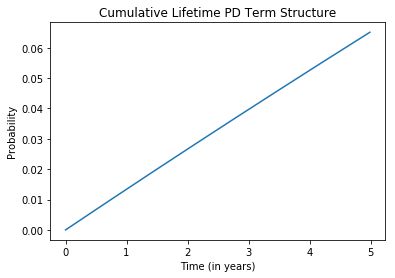

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

t = np.arange(0,5,.01)
PD = 0.0134
def f(x):
    return 1-math.exp(x*math.log(1-PD))
f2 = np.vectorize(f)
plt.plot(t, f2(t))
plt.title("Cumulative Lifetime PD Term Structure")
plt.xlabel("Time (in years)")
plt.ylabel("Probability")
plt.show()

#### 3.2.2 LGD Model
The current model follows a two-stage micro-structure model that decomposes LGD into two independent components - the Probability of Write-off given Default (PWOD) and the Expected Loss given Write-off (ELWO). That is, the PWOD represents the probability that a loan that has defaulted will end up being written-off (i.e. it does not recover) and the ELWO represents the expected severity of the loss given a write-off occurs. The relationship between LGD, PWOD, and ELWO is summarized by:
$$E(LGD)=E(PWOD\times ELWO)=E(PWOD)\times E(ELWO).$$

Where $E(\cdot)$ is the notation for the expected value of the random variable within the parentheses. The above formula relies on the assumption that PWOD and ELWO are independent random variables - this allows us to make the assertion that the expected value of the product is equal to the product of the expected values. This is a simplifying assumption that is generally accepted in the industry for the purpose of modelling expected credit losses.

The models for PWOD and ELWO are both based on common scorecard approaches that are built using logistic regression. For PWOD this is a natural fit since we are interested in the binary outcome of "write-off" or "no write-off". For ELWO, the outcome is theoretically a continuous number between 0 and 1 (i.e. no loss to total loss). Logistic regression is still leveraged in this case using industry standard transformations on the input data.




### 3.3 Proposed Alternatives using Machine Learning

#### 3.3.1 Lifetime PD Term Structure
In his recently published book (IFRS 9 and CECL Credit Risk Modelling and Validation: A Practical Guide with Examples Worked in R and SAS, 2019), Tiziano Bellini suggests some machine learning techniques well suited for lifetime PD modelling. The main suggestion is to use random forest with boosting and potentially integrating techniques from survival analysis (referred to by Bellini as random survival forest). In addition, compared to the current approach mentioned above, Support Vector Machine (SVM) seems like an appropriate choice in replacing the use of logistic regression.

The proposed approach for my project is to explore, SVM, random forest and random survival forest techniques as alternatives to the current Poisson process-based approach for modelling lifetime PD term structures.

The random survival forest approach described by Bellini is summarized by following steps:
* Bootstrap samples from the original data
* Randomly select predictors for splitting at each node of the tree with the goal of maximizing the differences between the survival rates of the child nodes
* Determine a hazard rate (based on survival analysis theory) across trees using an ensemble approach
* Calculate an out-of-bag (OOB) error rate for the ensemble

When it is broken down this way it becomes more obvious how this connects to the "building blocks of a learning algorithm" from Andriy Burkov's new book (The Hundred-Page Machine Learning Book, 2019). Theory from the field of survival analysis is used to help form the loss function that is being optimized through a random forest algorithm.
<br/>

#### 3.3.2 LGD Model
There are multiple machine learning techniques that might be appropriate for LGD modelling (Bellini, 2019). To some extent, which techniques are appropriate depends on whether the two-stage microstructure approach is retained from the current LGD Model or if the preference is to model LGD directly in one-step. Within the two-stage approach, classification and regression trees (CART) can be useful. For a one-step approach, bagging, random forest, and boosting could be useful. Another potential is deep neural networks. Lastly, as per IFRS 9 the expected credit loss calculations should consider "forward-looking" conditions based on macro-economic variables. Bellini proposes a "forward-looking random forest" approach  to meet this need.

The proposed approach for my project is to explore random forest, boosting, forward-looking random forest, and briefly deep neural networks to directly model LGD in one-step. 


### 3.4 Compare Performance

Recall that the objective of this project is to use modern data science and machine learning techniques to benchmark, challenge, refine, and enhance the more traditional statistical modelling methods. As such, of prime importance to me is how the alterative approaches described earlier perform compared to the current approaches. Performance in this context refers to model fit, accuracy, predictability, etc., as opposed to run-time performance. The approaches used to compare performance will differ between models.

* **Lifetime PD Term Structure** - Performance will be assessed by back-testing the current and alternative models against historical cumulative default rates to see which fits the distribution best (e.g. using Kolmogorov-Smirnov (KS)-test, Anderson Darling test).


* **LGD Model** - Performance will be assessed by comparing the current and alternative models against actual data to determine which most accurately predicts LGD rates. This could include tests like the Gini Index, KS-test, and receiver operating characteristic (ROC) test.

More relevant to the LGD model, the performance comparison will be made on the training data, test data, as well as the out-of-time data (i.e. data collected after the train and test data).
<br/>

## 4. Data

![alt text](https://github.com/kehler2a/visuals/blob/master/Data.PNG?raw=true "Data")
<br/>

### 4.1 Lifetime PD Term Structure

#### 4.1.1 Data overview
The data used to develop this model / analysis consists of annual default rates (i.e. % of loans that default in a given year) for the period of 1971 to 2014; along with portfolio characteristics and economic measures for each of those years. This period is used because it was the period for the development data for the current approach. While comparing the alternative approaches, more recent data (where available) will be brought in.

#### 4.1.2 Data sources
Much of this data is specific to my organization's historical portfolio experience. This is brought together from many source systems throughout the years - anywhere from old paper-based annual reports, to legacy Oracle databases, to newer Teradata databases. While the form of the data used in this analysis is very basic (i.e. flat table with annual records), it is a summarized view of much more complex data structures. For example, my organization currently has around 250,000 loans with 100,000 customers. This portfolio is every changing as new loans are brought on, old ones roll off, and as customers come in for account reviews and provide us with update information. For this year, daily, monthly, quarterly, and annual snapshots of various data warehouses are stored over time. In addition, transactional databases are combined with attribute tables for more robust data sets. 

The economic data typically comes from Statistics Canada tables and other industry organizations that collect and provide economic and agriculture data.

#### 4.1.3 Format
The existing data that was used to develop the current models is already available in summarized form in CSV format. Data from more recent periods will have to be brought together from Oracle and Teradata data warehouses (depending on the period) using SQL via SAS. This will also have to be combined with economic and agriculture industry data. However, this will simply be joining annual data together.

#### 4.1.4 Storage
All the underlying portfolio data is proprietary and will remain in the corporate data warehouses. The summarized flat data sets will not have proprietary data or sensitive information and will be small in size. This will make storage essentially a non-issue.  

### 4.2 LGD Model

#### 4.2.1 Data overview
The original LGD development data set consists of loan-level data for all loans that have defaulted from 2003 to 2012 within our portfolio. Additionally, the "out-of-time" data set used for performance testing purposes uses loan-level data from 2012 to 2016. This amounts to a little over 10,000 records with various loan, customer, industry, and economic information.

The remaining sections related to data sources, format, and storage are similar to the Lifetime PD Term Structure data described earlier.

The project report will include various statistics and data visualizations to provide more of an understanding on the data being used.
<br/>

## 5. Tools

The tools used to execute this project primarily include:
* **Jupyter Notebook** - To help organize, structure, and share the work.
* **Python** - Within the Jupyter Notebook, Python code cells will be used to share the relevant code from the analysis and to produce useful outputs and visualizations. Particularly the NumPy and Matplotlib libraries for Python will be very useful.
* **SAS** - Used to extract data from the relevant data sources.
* **R Studio** - While conducting the analysis, useful packages in R will be considered.
* **Github** - The final project material will be added to GitHub.
<br/>

![alt text](https://github.com/kehler2a/visuals/blob/master/Tools.PNG?raw=true "Tools")

<br/>

## 6. Timeline

The different sections of the project and the planned timelines are as follows:

* **Problem identification** - Complete by **January 24, 2020** for the project proposal submission soft deadline.

* **Planning and proposal** - Complete by **January 31, 2020** for the project proposal submission hard deadline.

* **Literature review** - Underway and will continue until **February 8, 2020** in advance of modelling phase.

* **Data gathering** - Underway and will continue until **February 8, 2020** in advance of modelling phase.

* **Machine learning modelling** - **February 8 to March 8, 2020** - Leave a full month for exploring and coding machine learning techniques. This will also include code for any data visualization.

* **Performance comparison** - **March 8 to March 15, 2020** to leave time to write-up the final report.

* **Final report** - Submitted by **March 31, 2020** (or earlier once submission deadline is known).

* **Deliver presentation** - Between **April 1 to April 10, 2020** during one of the scheduled times.

There above is summarized in the Gantt chart below:

![alt text](https://github.com/kehler2a/visuals/blob/master/Timelines.PNG?raw=true "Tools")

<br/>

## 7. Expected Outcomes

The overall expected outcome is evidence that machine learning techniques can be partnered with traditional statistical methods to create a more robust credit risk modelling program at my organization. More specifically, the expected outcomes of this project will be:

1. A machine learning based model that accurately represents the lifetime PD term structure. As a bonus, it potentially can include forward-looking economic variables (a process that currently uses a second model).
<br/>

2. An LGD model that is based on machine learning techniques that accurately represents the loss we can expect if a loan defaults. As a bonus, the attempt will be for this model to be a one-step model (as opposed to the current two-step) and have the ability to incorporate economic variables (a process that currently uses yet another model).
<br/>

3. It is unclear yet if the performance of the proposed models will be better than the current models.
    * If performance is better, there is potential to propose an alternative model for production.
    * If performance is not better (but still "good"), the models will be proposed as benchmark or "challenge" models that help provide additional comfort that the existing models are reasonable.


4. Useable code that can be leveraged by my organization to enhance our practices.
<br/>

5. Results that can be leveraged for various committees to provide additional assurance to senior management regarding the above models.

<br/>